Import Libraries 

In [338]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore")

# Text processing and visualization
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Save model
import pickle

Load and Explore the Dataset

In [339]:
# Load dataset
Car = pd.read_csv('dataset.csv')

In [340]:
# Preview the data
Car.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [341]:
# Dataset shape
print("Dataset Shape:", Car.shape)


Dataset Shape: (6019, 14)


In [342]:
# Info about columns
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [343]:
# Summary statistics
Car.describe(include="all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [344]:
# Check for missing values
print("\nMissing values:\n", Car.isnull().sum())



Missing values:
 Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


Data Cleaning

In [345]:
# Drop unnecessary columns
Car.drop(['Unnamed: 0', 'New_Price'], axis=1, inplace=True)

In [346]:
# Clean 'Mileage' column
Car['Mileage'] = Car['Mileage'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
Car['Mileage'] = pd.to_numeric(Car['Mileage'], errors='coerce')
Car['Mileage'] = Car['Mileage'].fillna(Car['Mileage'].median())

In [347]:
# Clean 'Engine' column
Car['Engine'] = Car['Engine'].astype(str).str.extract(r'(\d+)')
Car['Engine'] = pd.to_numeric(Car['Engine'], errors='coerce')
Car['Engine'] = Car['Engine'].fillna(Car['Engine'].median())


In [348]:
# Clean 'Power' column
Car['Power'] = Car['Power'].astype(str)
Car['Power'] = Car['Power'].replace('null', np.nan)
Car['Power'] = Car['Power'].str.extract(r'(\d+\.\d+|\d+)')
Car['Power'] = pd.to_numeric(Car['Power'], errors='coerce')

In [349]:
# Fill missing 'Seats' with mode
Car['Seats'] = Car['Seats'].fillna(Car['Seats'].mode()[0])

In [350]:
# Check final missing values
print("\nMissing values after cleaning:\n", Car.isnull().sum())


Missing values after cleaning:
 Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                143
Seats                  0
Price                  0
dtype: int64


In [351]:
# Fill missing 'Power' values using the median within each car name group
Car['Power'] = Car.groupby('Name')['Power'].transform(lambda x: x.fillna(x.median()))

#  For any remaining missing 'Power' values (e.g., if a car name had all missing), fill with overall median
Car['Power'] = Car['Power'].fillna(Car['Power'].median())

In [352]:
# Check final missing values
print("\nMissing values after cleaning:\n", Car.isnull().sum())


Missing values after cleaning:
 Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Price Column Check and Conversion

In [353]:
# Check price values
print("Price column check:")
print(Car['Price'].head(10))
print("Price Summary:")
print(Car['Price'].describe())

Price column check:
0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
5     2.35
6     3.50
7    17.50
8     5.20
9     1.95
Name: Price, dtype: float64
Price Summary:
count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


In [354]:
# Convert price to consistent unit
price_mean = Car['Price'].mean()
if price_mean < 100:
    print("Price appears to be in Lakhs")
    Car['Price_in_Rupees'] = Car['Price'] * 100000
else:
    print("Price appears to be in Rupees")
    Car['Price_in_Lakhs'] = Car['Price'] / 100000

Price appears to be in Lakhs


 Exploratory Data Analysis (EDA)

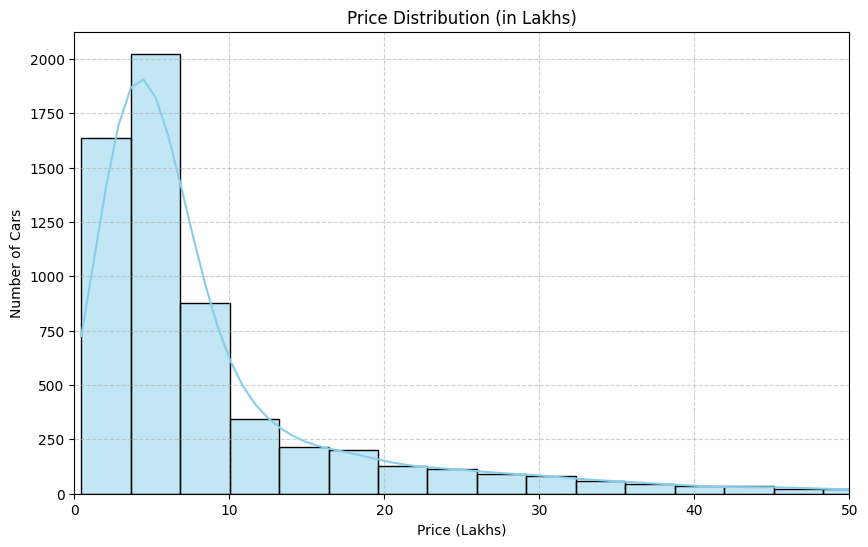

In [355]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Price_in_Rupees']/100000, bins=50, kde=True, color='skyblue')
plt.title('Price Distribution (in Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Number of Cars')
plt.xlim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

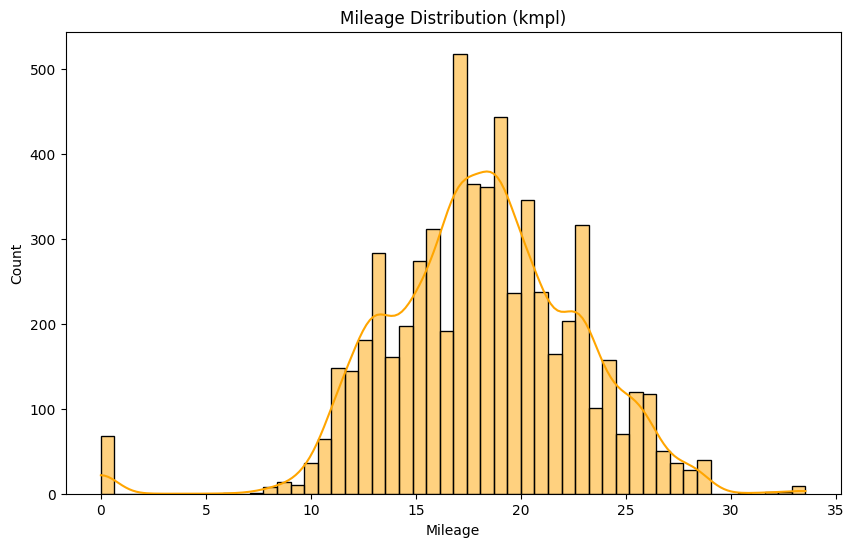

In [356]:
# Mileage Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Mileage'], kde=True, color='orange')
plt.title('Mileage Distribution (kmpl)')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

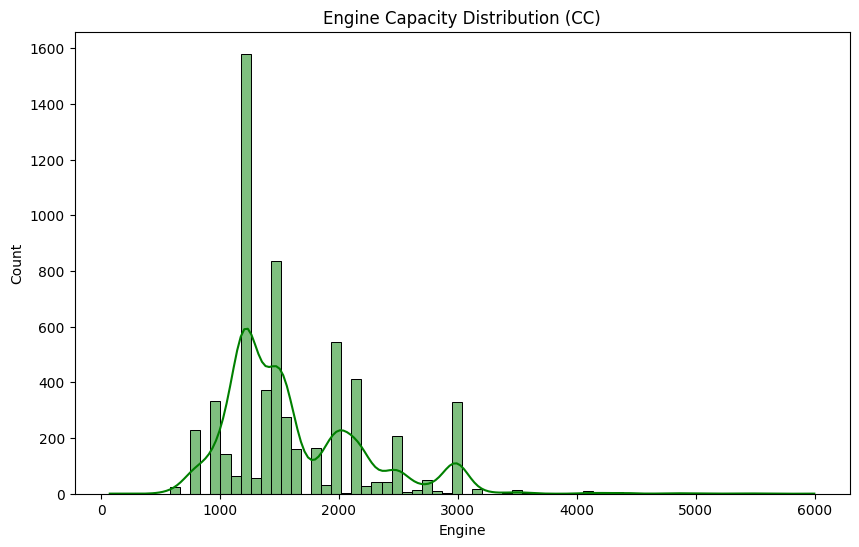

In [357]:
# Engine Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Engine'], kde=True, color='green')
plt.title('Engine Capacity Distribution (CC)')
plt.xlabel('Engine')
plt.ylabel('Count')
plt.show()


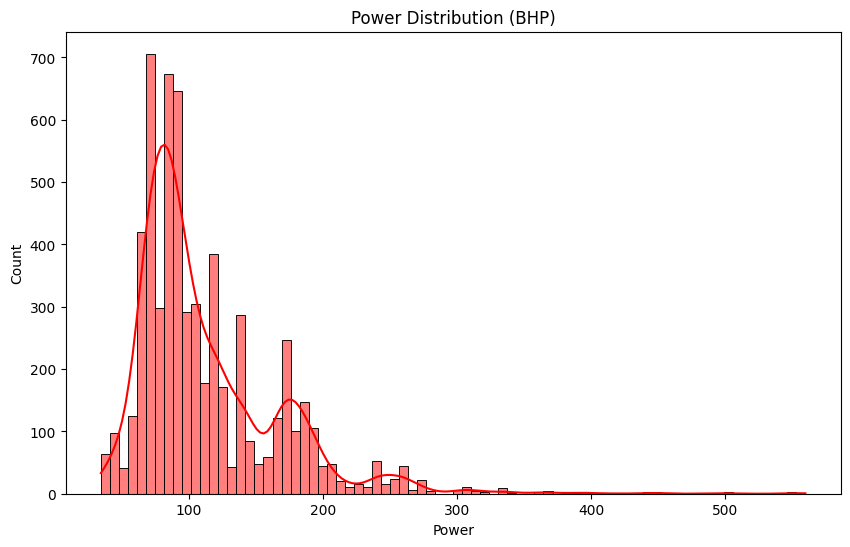

In [358]:
# Power Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Power'], kde=True, color='red')
plt.title('Power Distribution (BHP)')
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()

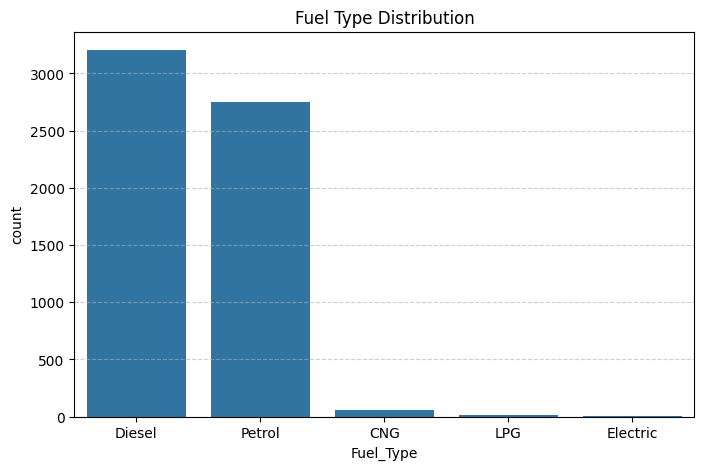

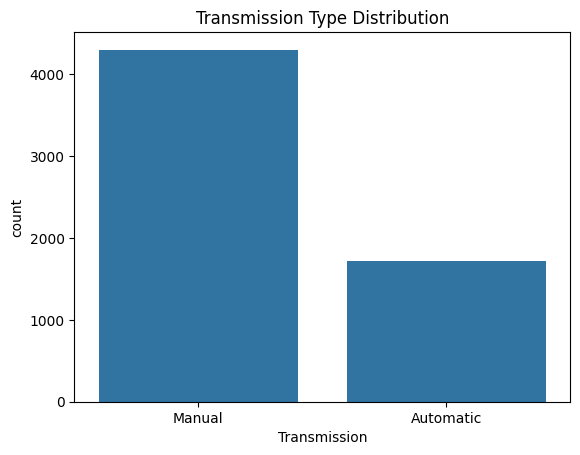

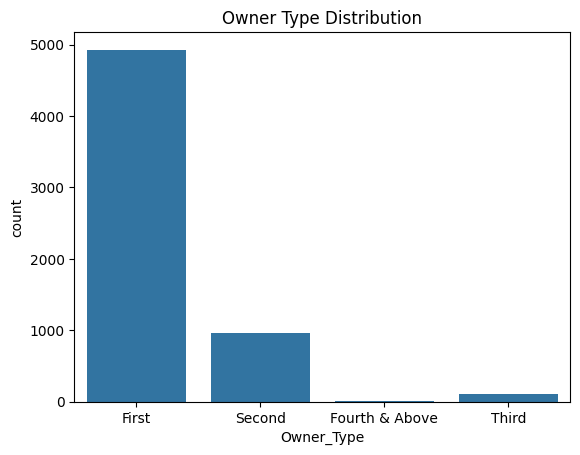

In [359]:
# Categorical Distributions 
plt.figure(figsize=(8,5))
sns.countplot(x='Fuel_Type', data=Car, order=Car['Fuel_Type'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure()
sns.countplot(x='Transmission', data=Car)
plt.title('Transmission Type Distribution')
plt.show()

plt.figure()
sns.countplot(x='Owner_Type', data=Car)
plt.title('Owner Type Distribution')
plt.show()

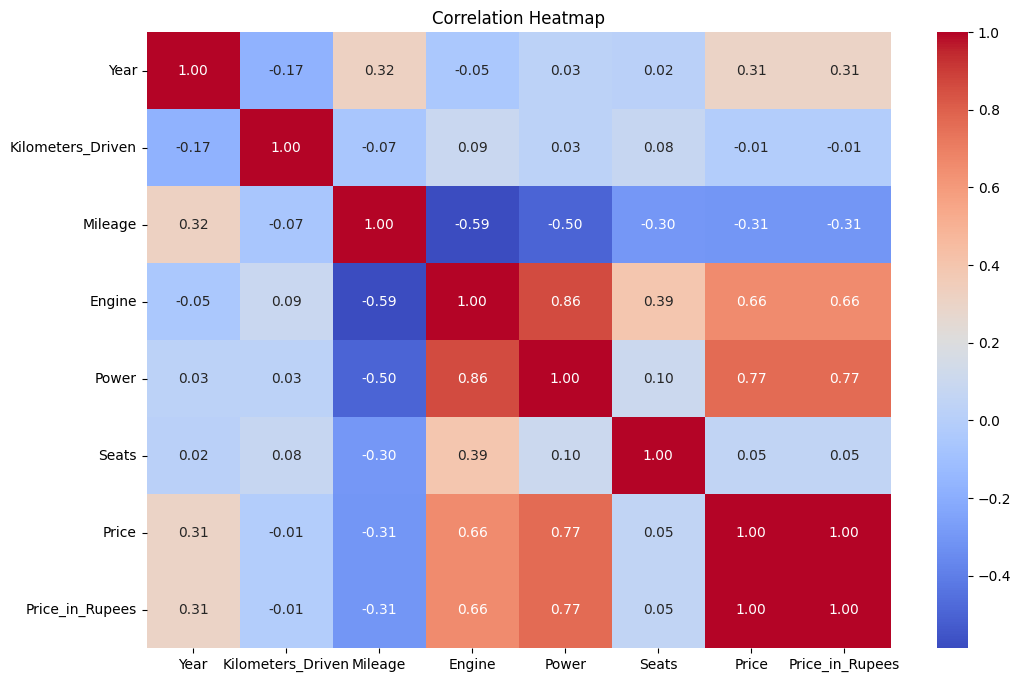

In [360]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(Car.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

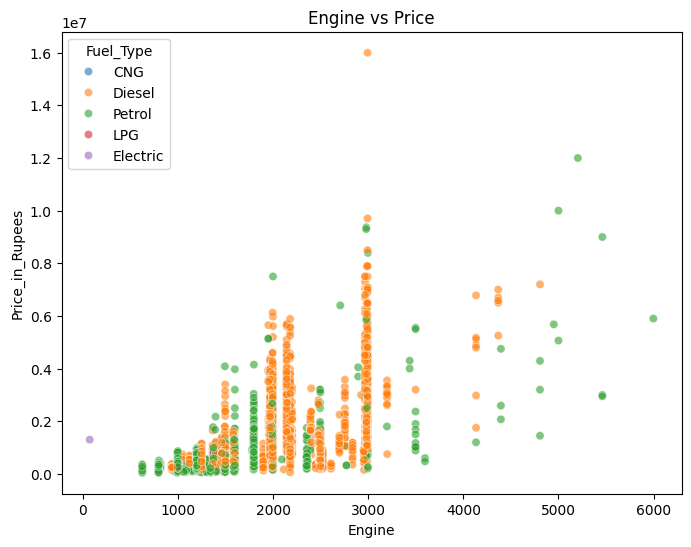

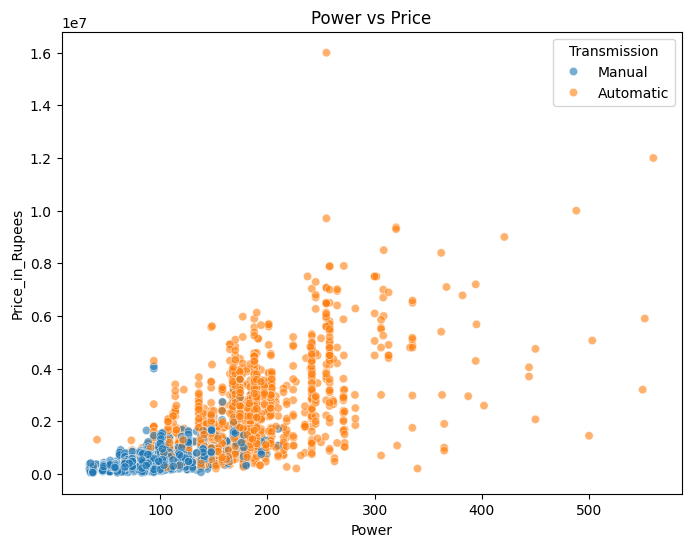

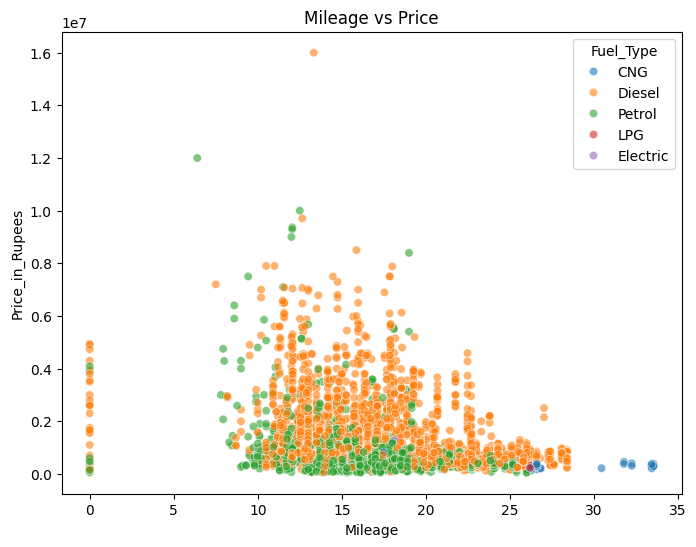

In [361]:
# Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x='Engine', y='Price_in_Rupees', hue='Fuel_Type', data=Car, alpha=0.6)
plt.title('Engine vs Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Power', y='Price_in_Rupees', hue='Transmission', data=Car, alpha=0.6)
plt.title('Power vs Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage', y='Price_in_Rupees', hue='Fuel_Type', data=Car, alpha=0.6)
plt.title('Mileage vs Price')
plt.show()

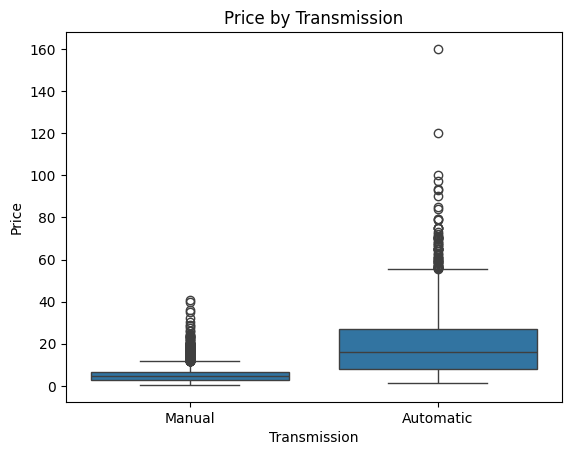

In [362]:
# Box Plot
sns.boxplot(x='Transmission', y='Price', data=Car)
plt.title('Price by Transmission')
plt.show()

Electric Vehicle Feature Adjustment

In [363]:
electric_mask = Car['Fuel_Type'].str.lower() == 'electric'
Car.loc[electric_mask, ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']] = 0

Feature Engineering

In [364]:
# Create 'Car_Age' feature
current_year = datetime.now().year
Car['Car_Age'] = current_year - Car['Year']

In [365]:
# Encode Owner_Type (ordinal)
owner_map = {
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth & Above": 4
}
Car["Owner_Type"] = Car["Owner_Type"].map(owner_map)

In [366]:
# Encode Transmission (binary)
trans_map = {
    "Manual": 0,
    "Automatic": 1
}
Car["Transmission"] = Car["Transmission"].map(trans_map)

In [367]:
# One-hot encode Fuel_Type (categorical)
Car = pd.get_dummies(Car, columns=["Fuel_Type"], drop_first=True)

In [368]:
# Adjust Electric Vehicle performance features
if "Fuel_Type_Electric" in Car.columns:
    electric_mask = Car["Fuel_Type_Electric"] == 1
    Car.loc[electric_mask, ["Mileage", "Engine", "Power", "Kilometers_Driven"]] = 0

In [369]:
# Confirm inclusion of key performance features
performance_features = ["Power", "Engine", "Mileage"]
missing = [f for f in performance_features if f not in Car.columns]
if missing:
    print(f"Missing performance features: {missing}")
else:
    print("Power, Engine, and Mileage included.")

Power, Engine, and Mileage included.
